### Import packages

In [56]:
%matplotlib inline

import mpld3
import matplotlib
import numpy as np
import pandas as pd
import psycopg2 as psy
import tensorflow as tf
import matplotlib.pyplot as plt

mpld3.enable_notebook()

### Import data

In [46]:
query_train = open('/home/nautilus/development/fun-times-in-python/sql-scripts/queries/pull-sample-stocks.sql').read()

In [173]:
connection = psy.connect("dbname = postgres user = rbetzler password = 'pwd' host = localhost")
cursor = connection.cursor()

df = pd.read_sql(query_train, connection)

connection.close()

In [146]:
df.index = df.date_time
df.index.names = ['date']
df = df.sort_index()

In [147]:
df.head(100)

,ticker,date_time,open,high,low,close,adj_close,volume,dividend,split_numerator,split_denominator,index,unix_timestamp
date,,,,,,,,,,,,,
1980-03-17 14:30:00,RLI,1980-03-17 14:30:00,0.4544,0.4800,0.4544,0.4544,0.021633,2400,NaN,NaN,NaN,0,322151400.0
1980-03-18 14:30:00,RLI,1980-03-18 14:30:00,0.4544,0.4608,0.4352,0.4352,0.020719,41200,NaN,NaN,NaN,1,322237800.0
1980-03-19 14:30:00,RLI,1980-03-19 14:30:00,0.4416,0.4672,0.4416,0.4416,0.021023,2400,NaN,NaN,NaN,2,322324200.0
1980-03-20 14:30:00,RLI,1980-03-20 14:30:00,0.4416,0.4416,0.4416,0.4416,0.021023,0,NaN,NaN,NaN,3,322410600.0
1980-03-21 14:30:00,RLI,1980-03-21 14:30:00,0.4480,0.4736,0.4480,0.4480,0.021328,8800,NaN,NaN,NaN,4,322497000.0
1980-03-24 14:30:00,RLI,1980-03-24 14:30:00,0.4480,0.4736,0.4480,0.4480,0.021328,38000,NaN,NaN,NaN,5,322756200.0
1980-03-25 14:30:00,RLI,1980-03-25 14:30:00,0.4480,0.4736,0.4480,0.4480,0.021328,65200,NaN,NaN,NaN,6,322842600.0
1980-03-26 14:30:00,RLI,1980-03-26 14:30:00,0.4480,0.4736,0.4480,0.4480,0.021328,11200,NaN,NaN,NaN,7,322929000.0
1980-03-27 14:30:00,RLI,1980-03-27 14:30:00,0.4096,0.4096,0.3840,0.3840,0.018281,190000,NaN,NaN,NaN,8,323015400.0


In [52]:
tickers = df.ticker.unique()
print(tickers)

['RLI']


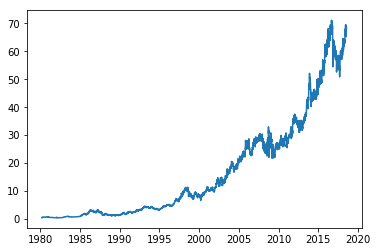

In [148]:
plt.plot(df.date_time, df.open)
plt.show()

In [149]:
df_open = pd.DataFrame(data = df.open,
                       index = df.index)

In [154]:
df_open = df_open.join(df_open.shift(-1), 
                       lsuffix = '_before', 
                       rsuffix = '_after', 
                       how = 'left')

In [155]:
df_open.head()

,open_before,open_after
date,,
1980-03-17 14:30:00,0.4544,0.4544
1980-03-18 14:30:00,0.4544,0.4416
1980-03-19 14:30:00,0.4416,0.4416
1980-03-20 14:30:00,0.4416,0.4480
1980-03-21 14:30:00,0.4480,0.4480
